In [1]:
import pandas as pd
import numpy as np
import pandas as pd 
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook
%matplotlib inline 


sns.set_style("whitegrid")

sns.despine(left=True, bottom=True)

plt.style.use('fivethirtyeight')
plt.show()

# list of files available
print(os.listdir("siim-isic-melanoma-classification"))

dir_path = "siim-isic-melanoma-classification/"

train_df = pd.read_csv(os.path.join(dir_path,"train.csv"))
test_df = pd.read_csv(os.path.join(dir_path,"test.csv"))

<Figure size 432x288 with 0 Axes>

['.DS_Store', 'test.csv', 'train.csv', 'jpeg', 'sample_submission.csv']


In [2]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33126 entries, 0 to 33125
Data columns (total 8 columns):
image_name                       33126 non-null object
patient_id                       33126 non-null object
sex                              33061 non-null object
age_approx                       33058 non-null float64
anatom_site_general_challenge    32599 non-null object
diagnosis                        33126 non-null object
benign_malignant                 33126 non-null object
target                           33126 non-null int64
dtypes: float64(1), int64(1), object(6)
memory usage: 2.0+ MB


In [3]:
print(f"train shape: {train_df.shape}")
print(f"test shape: {test_df.shape}")

train shape: (33126, 8)
test shape: (10982, 5)


In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10982 entries, 0 to 10981
Data columns (total 5 columns):
image_name                       10982 non-null object
patient_id                       10982 non-null object
sex                              10982 non-null object
age_approx                       10982 non-null float64
anatom_site_general_challenge    10631 non-null object
dtypes: float64(1), object(4)
memory usage: 429.1+ KB


In [5]:
print(train_df.head(5))

     image_name  patient_id     sex  age_approx anatom_site_general_challenge  \
0  ISIC_2637011  IP_7279968    male        45.0                     head/neck   
1  ISIC_0015719  IP_3075186  female        45.0               upper extremity   
2  ISIC_0052212  IP_2842074  female        50.0               lower extremity   
3  ISIC_0068279  IP_6890425  female        45.0                     head/neck   
4  ISIC_0074268  IP_8723313  female        55.0               upper extremity   

  diagnosis benign_malignant  target  
0   unknown           benign       0  
1   unknown           benign       0  
2     nevus           benign       0  
3   unknown           benign       0  
4   unknown           benign       0  


In [6]:
train_df.groupby(['benign_malignant']).count()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,target
benign_malignant,,,,,,,
benign,32542,32542,32477,32474,32024,32542,32542
malignant,584,584,584,584,575,584,584


In [7]:
train_df.groupby(['benign_malignant']).count()['sex'].to_frame()

,sex
benign_malignant,
benign,32477
malignant,584


In [8]:
print(test_df.head(5))

     image_name  patient_id     sex  age_approx anatom_site_general_challenge
0  ISIC_0052060  IP_3579794    male        70.0                           NaN
1  ISIC_0052349  IP_7782715    male        40.0               lower extremity
2  ISIC_0058510  IP_7960270  female        55.0                         torso
3  ISIC_0073313  IP_6375035  female        50.0                         torso
4  ISIC_0073502  IP_0589375  female        45.0               lower extremity


#### Train csv file has three additional columns; diagnois, benign_malignant, and target. The objective here is to predict the probablity, i.e. target that the sample is maligant or benign.

In [9]:
train_images = os.listdir(os.path.join(dir_path,"jpeg/train"))
test_images = os.listdir(os.path.join(dir_path, "jpeg/test"))

In [10]:
print(f"Length of train image_name: {train_df.image_name.nunique()}")
print(f"Length of train images: {len(train_images)}")
print(f"Length of test image_name: {test_df.image_name.nunique()}")
print(f"Length of test images: {len(test_images)}")

Length of train image_name: 33126
Length of train images: 33126
Length of test image_name: 10982
Length of test images: 10982


### Some missing values

In [14]:
# https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe
train_df.isna().sum()    
# train_df.isnull().sum().sum()

image_name                         0
patient_id                         0
sex                               65
age_approx                        68
anatom_site_general_challenge    527
diagnosis                          0
benign_malignant                   0
target                             0
dtype: int64

#### Train Data
   ##### sex: 65 missing values, 0.2% of total data
   ##### age: 68 missing values
   ##### anatomy: 527 missing values, 1.59% of total data

In [15]:
test_df.isna().sum()

image_name                         0
patient_id                         0
sex                                0
age_approx                         0
anatom_site_general_challenge    351
dtype: int64

#### Test Data
  ##### anatomy: 351 missing values, 3.1% of total data

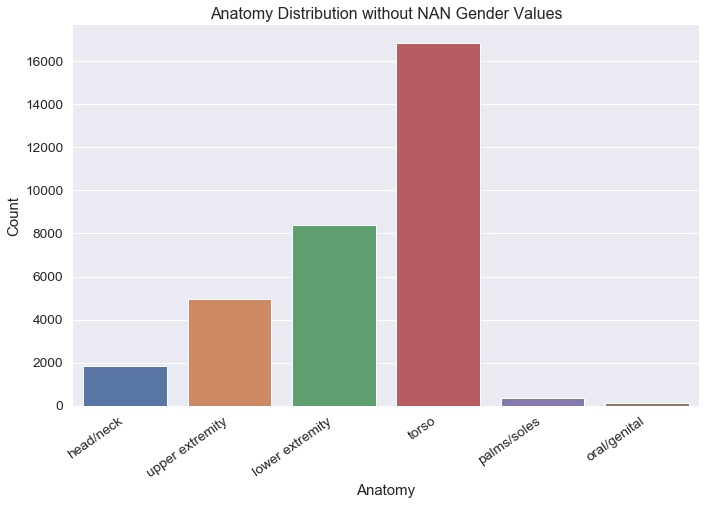

In [16]:
sns.set(font_scale=1.25)
is_sex = train_df[train_df['sex'].isna() == False]
plt.figure(figsize=(10, 7))

a = sns.countplot(is_sex['anatom_site_general_challenge'])
a.set_title('Anatomy Distribution without NAN Gender Values', fontsize=16)

a.set_xticklabels(a.get_xticklabels(), rotation=35, ha="right")
a.set_xlabel("Anatomy")
a.set_ylabel("Count")
sns.despine(left=True, bottom=True);

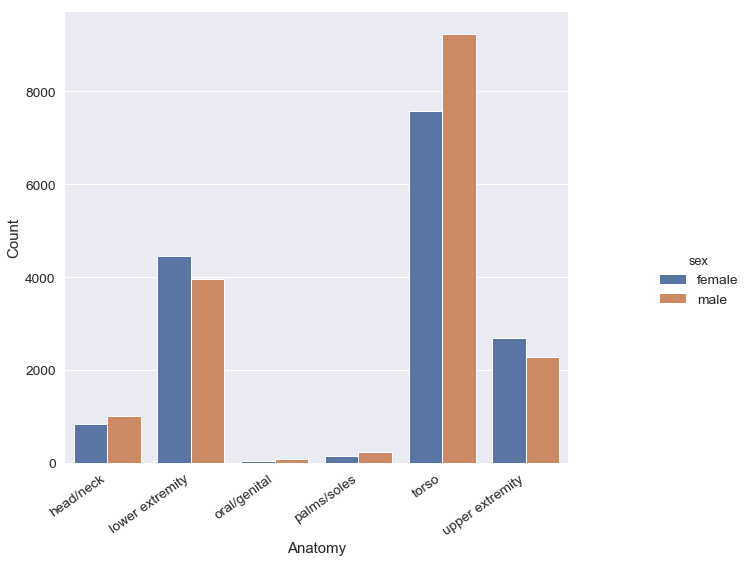

In [18]:
b = train_df.groupby(['sex','anatom_site_general_challenge'])['benign_malignant'].count().to_frame().reset_index()
b.style.background_gradient(cmap='Reds')
sns.catplot(x='anatom_site_general_challenge',y='benign_malignant', hue='sex',data=b,kind='bar')
plt.gcf().set_size_inches(12,8)

plt.xlabel("Anatomy")
plt.xticks(rotation=35, ha="right")
plt.ylabel("Count")
sns.despine(left=True, bottom=True);

In [11]:
print(f"The total patient ids are {train_df['patient_id'].count()}, from those the unique ids are {train_df['patient_id'].value_counts().shape[0]} ")

The total patient ids are 33126, from those the unique ids are 2056 


In [19]:
train_df['target'].value_counts()

0    32542
1      584
Name: target, dtype: int64

Text(0,0.5,'Count')

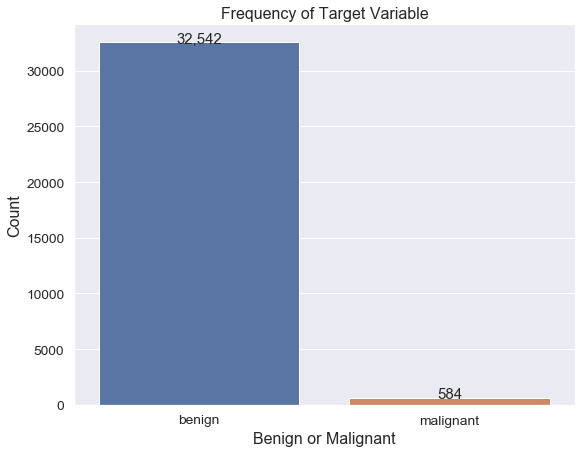

In [16]:
sns.set(font_scale=1.25)
plt.figure(figsize=(8, 7))
a = sns.countplot(data = train_df, x = 'benign_malignant')
a.set_title("Frequency of Target Variable", fontsize=16)

# https://stackoverflow.com/questions/55104819/display-count-on-top-of-seaborn-barplot
for p in a.patches:  
    a.annotate(format(p.get_height(), ','), 
       (p.get_x() + p.get_width() / 2., 
        p.get_height()), ha = 'center', va = 'center', 
       xytext = (0, 4), textcoords = 'offset points')

plt.xlabel('Benign or Malignant', fontsize=16); plt.ylabel('Count', fontsize=16)
# sns.despine(left=True, bottom=True);

Text(0.5,1,'Distribution of Sex by Target Variable')

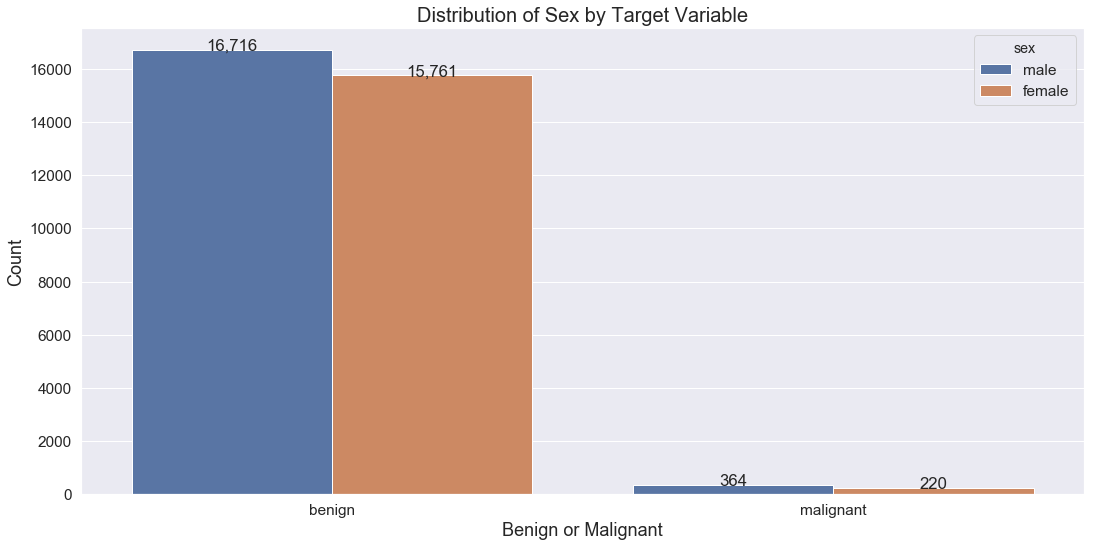

In [334]:
#sns.set(font_scale=1.4)
plt.figure(figsize=(16,8))
b = sns.countplot(data=train_df, x='benign_malignant', hue='sex')

for p in b.patches:
    b.annotate(format(p.get_height(), ','), 
           (p.get_x() + p.get_width() / 2., 
            p.get_height()), ha = 'center', va = 'center', 
           xytext = (0, 4), textcoords = 'offset points')

plt.xlabel('Benign or Malignant', fontsize=18); plt.ylabel('Count', fontsize=18)
plt.title('Distribution of Sex by Target Variable', fontsize=20)

Text(0.5,1,'Age Distribution of Patients')

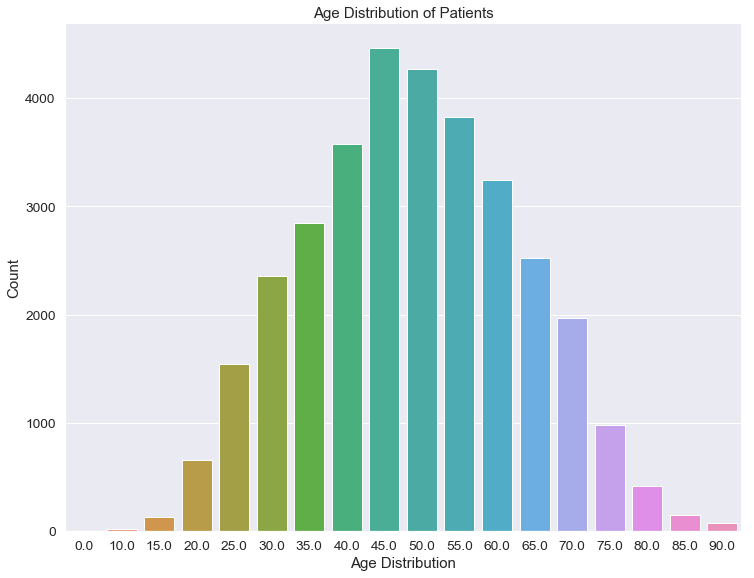

In [299]:
#sns.set(font_scale=1.25)
# plt.figure(figsize=(10,6))
ax = sns.catplot(x='age_approx',kind='count',data=train_df)
plt.gcf().set_size_inches(12,9)
plt.xlabel('Age Distribution')
plt.ylabel('Count')
plt.title('Age Distribution of Patients')

/Users/phuyaldeep/ENTER/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/phuyaldeep/ENTER/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/phuyaldeep/ENTER/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Distribution of Ages Benign and Malignant')

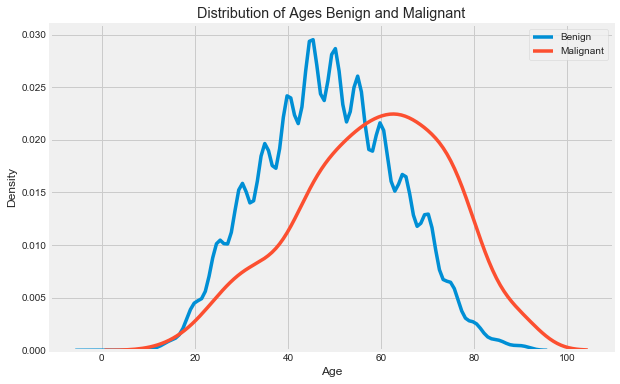

In [11]:
plt.figure(figsize=(9,6))

b = sns.distplot(a = train_df[train_df['target']==0]['age_approx'],hist=False, kde_kws=dict(linewidth=3.5), label='Benign')
m = sns.distplot(a = train_df[train_df['target']==1]['age_approx'],hist=False, kde_kws=dict(linewidth=3.5), label='Malignant')

#sns.displot()

plt.xlabel('Age'); plt.ylabel('Density'); plt.title('Distribution of Ages Benign and Malignant')

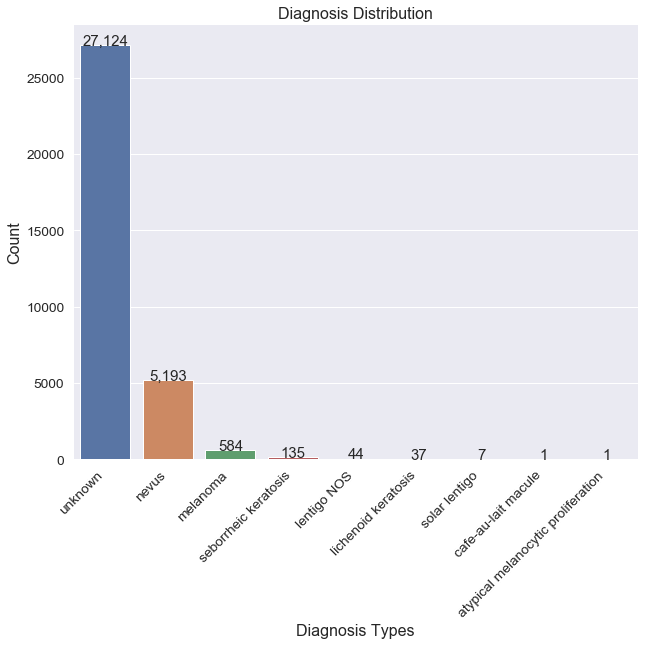

In [23]:
sns.set(font_scale=1.25)
plt.figure(figsize=(9, 8))
a = sns.countplot(train_df['diagnosis'])
a.set_title("Diagnosis Distribution", fontsize=16)

a.set_xticklabels(a.get_xticklabels(), rotation=45, ha="right")

# https://stackoverflow.com/questions/55104819/display-count-on-top-of-seaborn-barplot
for p in a.patches:  
    a.annotate(format(p.get_height(), ','), 
       (p.get_x() + p.get_width() / 2., 
        p.get_height()), ha = 'center', va = 'center', 
       xytext = (0, 4), textcoords = 'offset points')

plt.xlabel('Diagnosis Types', fontsize=16); plt.ylabel('Count', fontsize=16)
sns.despine(left=True, bottom=True);

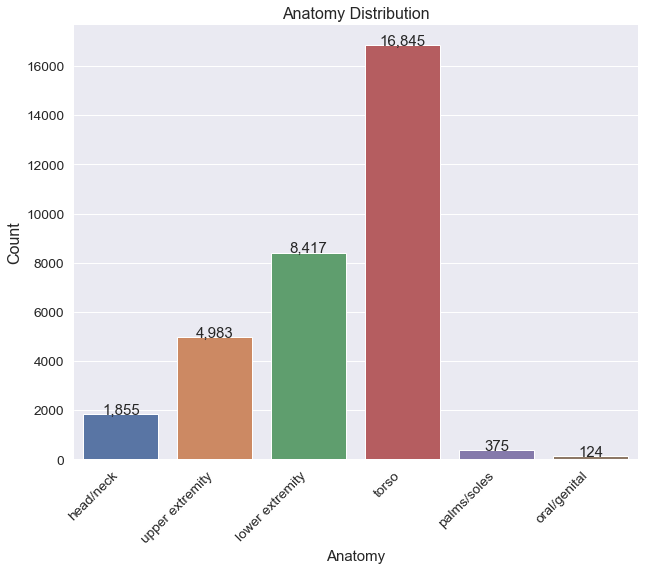

In [27]:
sns.set(font_scale=1.25)
plt.figure(figsize=(9, 8))

a = sns.countplot(train_df['anatom_site_general_challenge'])

a.set_xticklabels(a.get_xticklabels(), rotation=45, ha="right")

for p in a.patches:
    a.annotate(format(p.get_height(), ','), 
           (p.get_x() + p.get_width() / 2., 
            p.get_height()), ha = 'center', va = 'center', 
           xytext = (0, 4), textcoords = 'offset points')
    
a.set_xlabel('Anatomy')
a.set_title('Anatomy Distribution', fontsize=16); plt.ylabel('Count', fontsize=16)
sns.despine(left=True, bottom=True);

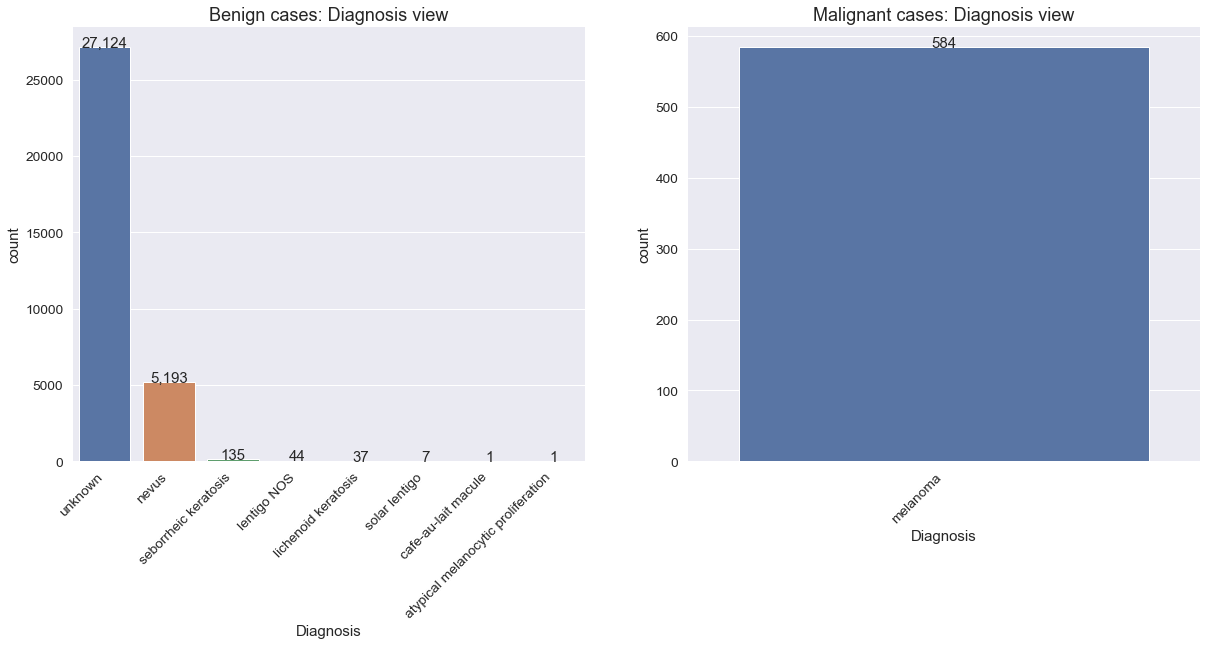

In [28]:
sns.set(font_scale=1.25)
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (18, 8))

a = sns.countplot(train_df[train_df['target']==0]['diagnosis'], ax=ax1)
b = sns.countplot(train_df[train_df['target']==1]['diagnosis'], ax=ax2)

a.set_xticklabels(a.get_xticklabels(), rotation=45, ha="right")
b.set_xticklabels(b.get_xticklabels(), rotation=45, ha="right")

for p in a.patches:
    a.annotate(format(p.get_height(), ','), 
           (p.get_x() + p.get_width() / 2., 
            p.get_height()), ha = 'center', va = 'center', 
           xytext = (0, 4), textcoords = 'offset points')
    
for p in b.patches:
    b.annotate(format(p.get_height(), ','), 
           (p.get_x() + p.get_width() / 2., 
            p.get_height()), ha = 'center', va = 'center', 
           xytext = (0, 4), textcoords = 'offset points')

a.set_xlabel('Diagnosis'); b.set_xlabel('Diagnosis')
ax1.set_title('Benign cases: Diagnosis view', fontsize=18)
ax2.set_title('Malignant cases: Diagnosis view', fontsize=18)
sns.despine(left=True, bottom=True);

#### Overview of Test Dataset 

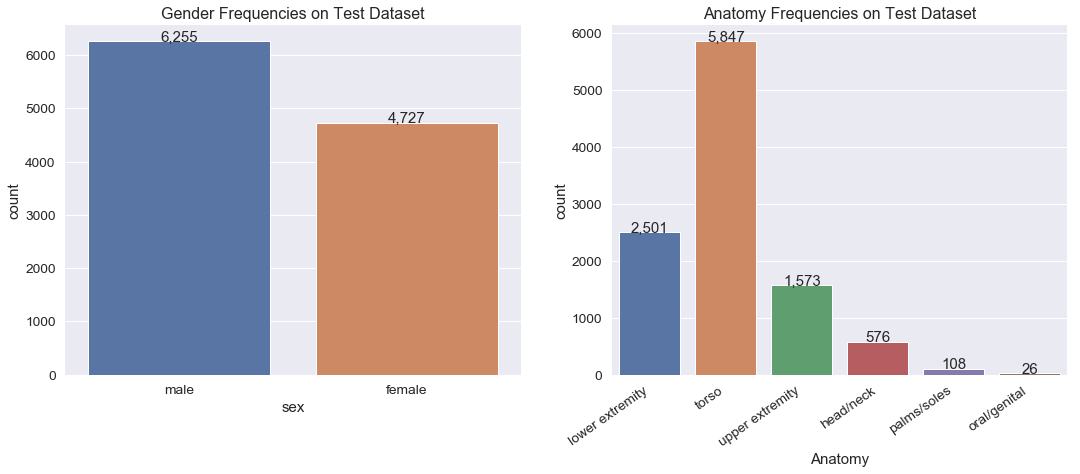

In [391]:
sns.set(font_scale=1.25)
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 6))

a = sns.countplot(test_df['sex'], ax=ax1)
b = sns.countplot(test_df['anatom_site_general_challenge'], ax=ax2)
#c = sns.distplot(a = test_df['age_approx'], ax=ax3, hist=False, rug=True, kde_kws=dict(linewidth=4))

for p in a.patches:
    a.annotate(format(p.get_height(), ','), 
           (p.get_x() + p.get_width() / 2., 
            p.get_height()), ha = 'center', va = 'center', 
           xytext = (0, 4), textcoords = 'offset points')
    
for p in b.patches:
    b.annotate(format(p.get_height(), ','), 
           (p.get_x() + p.get_width() / 2., 
            p.get_height()), ha = 'center', va = 'center', 
           xytext = (0, 4), textcoords = 'offset points')
    
b.set_xticklabels(b.get_xticklabels(), rotation=35, ha="right")

b.set_xlabel('Anatomy')
ax1.set_title('Gender Frequencies on Test Dataset', fontsize=16)
ax2.set_title('Anatomy Frequencies on Test Dataset', fontsize=16)
#ax3.set_title('Age Distribution on Test Dataset', fontsize=16)
sns.despine(left=True, bottom=True);

/Users/phuyaldeep/ENTER/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Age Distribution on Test Dataset')

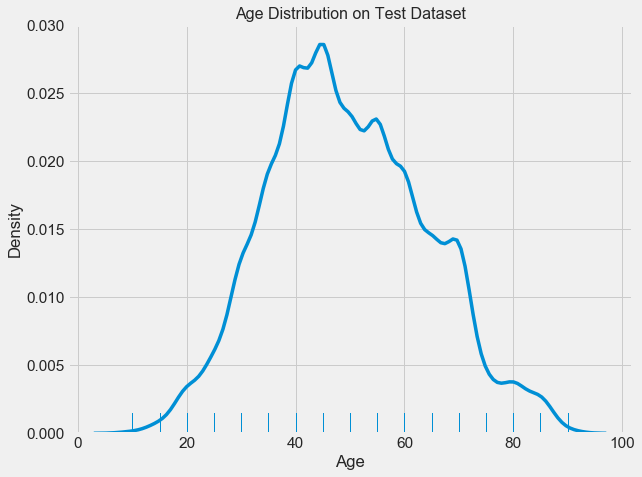

In [371]:
plt.figure(figsize=(9,7))

c = sns.distplot(a = test_df['age_approx'], 
                 hist=False, rug=True, kde_kws=dict(linewidth=3.5))
plt.xlabel('Age'); plt.ylabel('Density'); plt.title('Age Distribution on Test Dataset', fontsize=16)

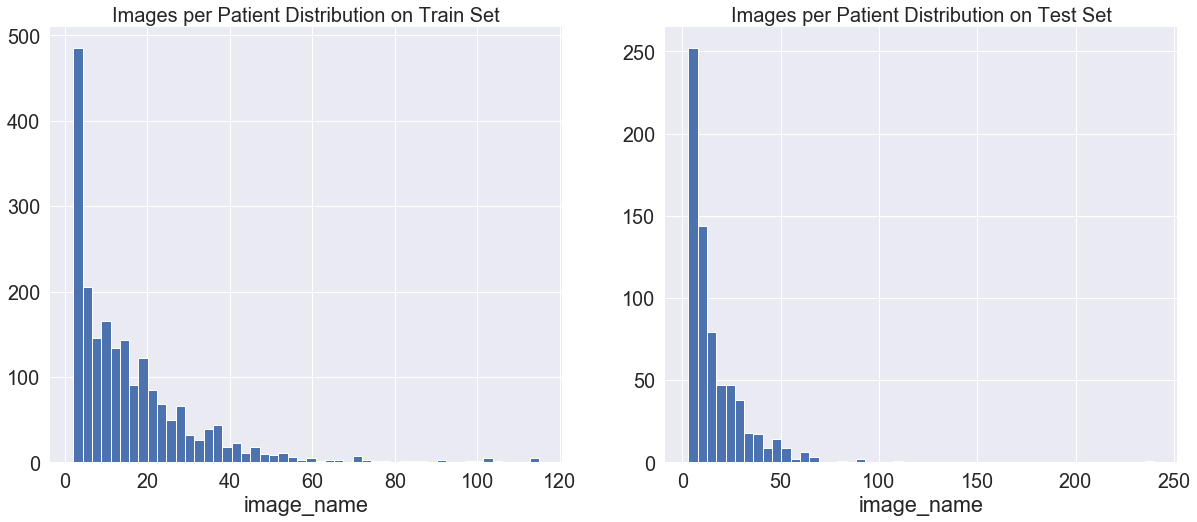

In [29]:
sns.set(font_scale=1.8)
train_patients_count = train_df.groupby(by='patient_id')['image_name'].count().reset_index()
test_patients_count = test_df.groupby(by='patient_id')['image_name'].count().reset_index()
test_patients_count

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (18, 8))

a = sns.distplot(train_patients_count['image_name'], kde=False, bins=50, 
                 ax=ax1, hist_kws={'alpha': 1})
b = sns.distplot(test_patients_count['image_name'], kde=False, bins=50, 
                 ax=ax2, hist_kws={'alpha': 1})
    
ax1.set_title('Images per Patient Distribution on Train Set', fontsize=20)
ax2.set_title('Images per Patient Distribution on Test Set', fontsize=20)
sns.despine(left=True, bottom=True);

### Visualing Images: JPEG

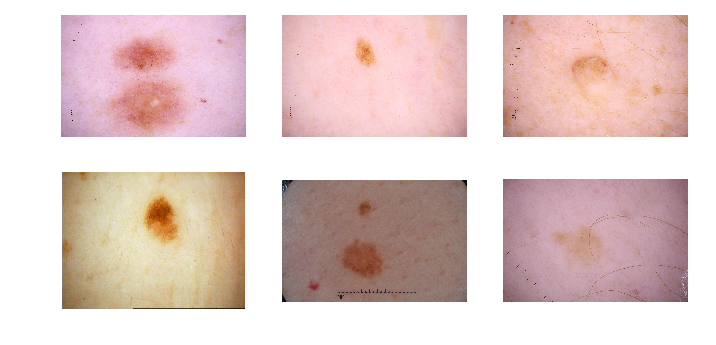

In [427]:
img = train_df['image_name'].values


# extract six random images from img array
random_img = [np.random.choice(img+'.jpg') for i in range(6)]

img_dir = dir_path+'jpeg/train'
plt.figure(figsize=(10,8))

for i in range(6):
    plt.subplot(3, 3, i+1)
    img = plt.imread(os.path.join(img_dir, random_img[i]))
    plt.imshow(img, cmap='Dark2')
    plt.axis('off')
    

#### Visualizing Benign and Malignant Images

In [434]:
benign_img = train_df[train_df['benign_malignant'] == 'benign']
malignant_img = train_df[train_df['benign_malignant'] == 'malignant']

Nine random Benign Images


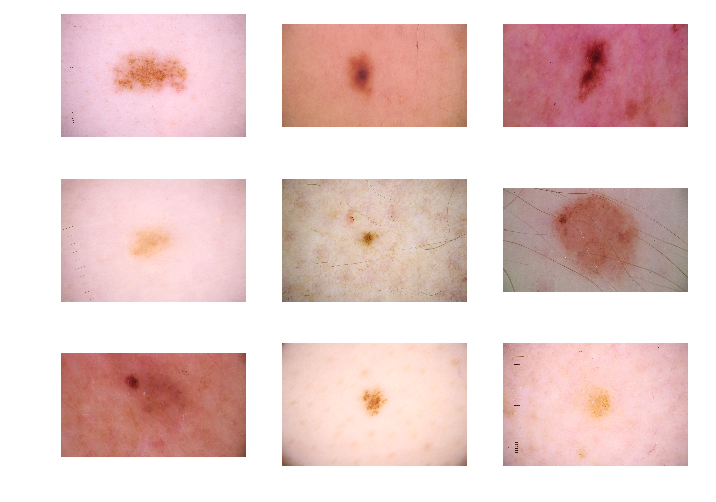

In [449]:
img = benign_img['image_name'].values

# extract nine random images from img array
random_img = [np.random.choice(img+'.jpg') for i in range(9)]

print('Nine random Benign Images')

img_dir = dir_path+'jpeg/train'
plt.figure(figsize=(10,8))

for i in range(9):
    plt.subplot(3, 3, i+1)
    img = plt.imread(os.path.join(img_dir, random_img[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')


Nine random Malignant Images


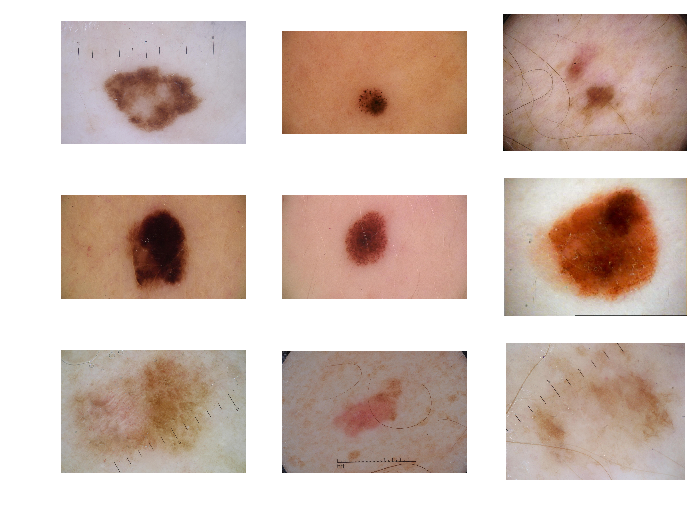

In [451]:
img = malignant_img['image_name'].values

# extract nine random images from img array
random_img = [np.random.choice(img+'.jpg') for i in range(9)]

print('Nine random Malignant Images')

img_dir = dir_path+'jpeg/train'
plt.figure(figsize=(10,8))

for i in range(9):
    plt.subplot(3, 3, i+1)
    img = plt.imread(os.path.join(img_dir, random_img[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')


In [455]:
!pip install pydicom

You should consider upgrading via the '/Users/phuyaldeep/ENTER/bin/python -m pip install --upgrade pip' command.


In [478]:
import pydicom # for DICOM images

train_path = dir_path + 'train/' + train_df['image_name'] + '.dcm'
test_path = dir_path + 'test/' + test_df['image_name'] + '.dcm'

train_df['dicom_path'] = train_path

#train_path.head()

test_df['dicom_path'] = test_path
test_path.head()

0    siim-isic-melanoma-classification/test/ISIC_00...
1    siim-isic-melanoma-classification/test/ISIC_00...
2    siim-isic-melanoma-classification/test/ISIC_00...
3    siim-isic-melanoma-classification/test/ISIC_00...
4    siim-isic-melanoma-classification/test/ISIC_00...
Name: image_name, dtype: object

In [479]:
def show_images(data, n = 5, rows=1, cols=5, title='Default'):
    plt.figure(figsize=(16,4))

    for k, path in enumerate(data['dicom_path'][:n]):
        image = pydicom.read_file(path)
        image = image.pixel_array
        
        # image = resize(image, (200, 200), anti_aliasing=True)

        plt.suptitle(title, fontsize = 16)
        plt.subplot(rows, cols, k+1)
        plt.imshow(image)
        plt.axis('off')

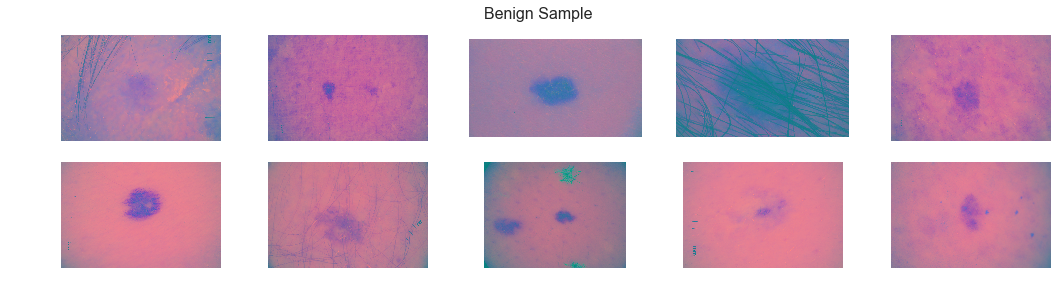

In [481]:
show_images(train_df[train_df['target'] == 0], n=10, rows=2, cols=5, title='Benign Sample')

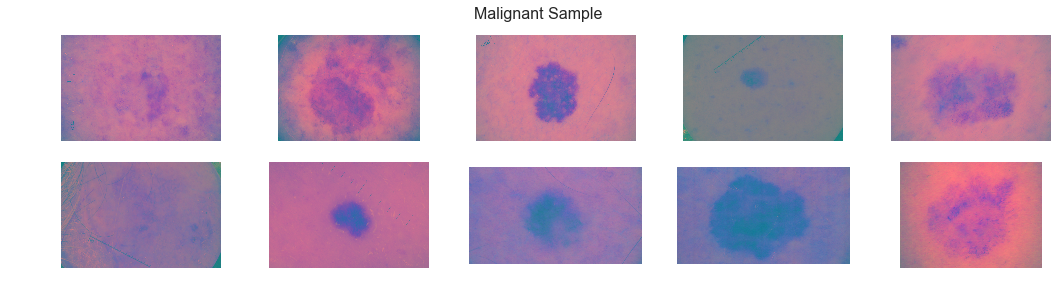

In [482]:
show_images(train_df[train_df['target'] == 1], n=10, rows=2, cols=5, title='Malignant Sample')

In [93]:
"""
    code to build a custom dataset
"""

import torch
import os
from torchvision import transforms
from torch.utils.data import DataLoader,Dataset
#from skimage import io,transform
from PIL import Image
import pandas as pd
import torchvision.models as models
import torch.nn as nn
import cv2

#df = pd.read_csv("train.csv")

dir_path = "siim-isic-melanoma-classification/"
train_df = pd.read_csv(os.path.join(dir_path,"train.csv"))

class CustomDataset(Dataset):
    
    def __init__(self, root_dir, df, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.images = os.listdir(self.root_dir) # all image files in the directory
        self.df = df
        
    def __len__(self):
        return self.df.shape[0] # returns the size of the entire dataset
    
    def __getitem__(self,index):
        #image_index = self.images
        img_path = os.path.join(self.root_dir,"jpeg","train",self.df.iloc[index]["image_name"] + ".jpg")
        img = cv2.imread(img_path)
        img = cv2.resize(img, (256, 256))
        img = img.astype("float32")
        img = np.rollaxis(img,2,0)
        img_label = np.array(self.df.iloc[index]["target"],dtype=np.float32)
        
        if self.transform:
            img = self.transform(img)
        return img, torch.tensor(img_label)

In [94]:
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
])

In [95]:
# loads pretrained resnet model
model = models.resnet50(pretrained=True)
    
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2) # Sigmoid instead of linear (create a model class), output sigmoid
#model.fc = model.fc.cuda() if True else model.fc


In [96]:
#train_df = pd.read_csv(os.path.join(self.root_dir,"train.csv"))
data = CustomDataset(dir_path, train_df)
dataloader = DataLoader(data, batch_size=2)

In [97]:
iter(dataloader)

In [98]:
x,y = next(iter(dataloader))
x

tensor([[[[152., 148., 161.,  ...,  87.,  90.,  89.],
          [170., 152., 131.,  ...,  92.,  92.,  89.],
          [144., 134., 103.,  ...,  90.,  88.,  87.],
          ...,
          [ 88.,  97.,  92.,  ...,  94.,  93.,  90.],
          [ 89.,  95.,  85.,  ...,  94.,  94.,  92.],
          [ 83.,  95.,  91.,  ...,  90.,  91.,  89.]],

         [[135., 136., 137.,  ...,  62.,  61.,  60.],
          [149., 134., 120.,  ...,  67.,  66.,  62.],
          [133., 130., 124.,  ...,  65.,  64.,  61.],
          ...,
          [ 82.,  87.,  86.,  ...,  79.,  78.,  74.],
          [ 83.,  86.,  82.,  ...,  77.,  79.,  75.],
          [ 77.,  83.,  86.,  ...,  72.,  76.,  73.]],

         [[178., 182., 176.,  ..., 142., 140., 139.],
          [182., 176., 165.,  ..., 147., 141., 142.],
          [177., 167., 168.,  ..., 145., 142., 137.],
          ...,
          [136., 140., 141.,  ..., 147., 139., 135.],
          [138., 142., 138.,  ..., 144., 142., 139.],
          [134., 141., 141.,  ...

In [100]:
import torch.optim as optim
import torch.nn as nn

# set what parameters to optimize and what to freeze. Useful in transfer learning. 
optimizer = optim.Adam(model.parameters(), lr=0.001) 
loss_function = nn.MSELoss() #BCE loss with logi

EPOCHS = 2

for epoch in range(EPOCHS):
    for data in dataloader: 
        # data is a batch of feature-sets and labels
        img, labels = data
        optimizer.zero_grad()
        #net.zero_grad()
        output = model(img)
        loss = loss_function(output, labels)
        loss.backward()
        optimizer.step() # adjusts the weights  
        print(loss)

/Users/phuyaldeep/ENTER/lib/python3.7/site-packages/torch/nn/modules/loss.py:445: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(0.0141, grad_fn=<MseLossBackward>)


/Users/phuyaldeep/ENTER/lib/python3.7/site-packages/torch/nn/modules/loss.py:445: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(1.4902, grad_fn=<MseLossBackward>)


/Users/phuyaldeep/ENTER/lib/python3.7/site-packages/torch/nn/modules/loss.py:445: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(0.4589, grad_fn=<MseLossBackward>)


/Users/phuyaldeep/ENTER/lib/python3.7/site-packages/torch/nn/modules/loss.py:445: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(0.8527, grad_fn=<MseLossBackward>)


/Users/phuyaldeep/ENTER/lib/python3.7/site-packages/torch/nn/modules/loss.py:445: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(6.2438, grad_fn=<MseLossBackward>)


/Users/phuyaldeep/ENTER/lib/python3.7/site-packages/torch/nn/modules/loss.py:445: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(0.6136, grad_fn=<MseLossBackward>)


/Users/phuyaldeep/ENTER/lib/python3.7/site-packages/torch/nn/modules/loss.py:445: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(0.5205, grad_fn=<MseLossBackward>)


/Users/phuyaldeep/ENTER/lib/python3.7/site-packages/torch/nn/modules/loss.py:445: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(0.1363, grad_fn=<MseLossBackward>)


/Users/phuyaldeep/ENTER/lib/python3.7/site-packages/torch/nn/modules/loss.py:445: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(0.2530, grad_fn=<MseLossBackward>)


/Users/phuyaldeep/ENTER/lib/python3.7/site-packages/torch/nn/modules/loss.py:445: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(0.1747, grad_fn=<MseLossBackward>)


/Users/phuyaldeep/ENTER/lib/python3.7/site-packages/torch/nn/modules/loss.py:445: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(0.1205, grad_fn=<MseLossBackward>)


/Users/phuyaldeep/ENTER/lib/python3.7/site-packages/torch/nn/modules/loss.py:445: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(0.1320, grad_fn=<MseLossBackward>)


/Users/phuyaldeep/ENTER/lib/python3.7/site-packages/torch/nn/modules/loss.py:445: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(0.0849, grad_fn=<MseLossBackward>)


/Users/phuyaldeep/ENTER/lib/python3.7/site-packages/torch/nn/modules/loss.py:445: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(0.0678, grad_fn=<MseLossBackward>)


/Users/phuyaldeep/ENTER/lib/python3.7/site-packages/torch/nn/modules/loss.py:445: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(0.0489, grad_fn=<MseLossBackward>)


/Users/phuyaldeep/ENTER/lib/python3.7/site-packages/torch/nn/modules/loss.py:445: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(0.0195, grad_fn=<MseLossBackward>)


KeyboardInterrupt: 